In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
# import basics library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
## Feature engineering
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [17]:
# concatenate these variables with dataframe
X.drop(["Geography", "Gender"], axis=1, inplace=True)

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
X = pd.concat([X, geography, gender], axis=1)

In [21]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
(X_train.shape, y_train.shape)

((8000, 11), (8000,))

In [26]:
(X.shape, y.shape)

((10000, 11), (10000,))

In [30]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

array([[-0.21829885,  0.38795568,  1.37698033, ..., -0.58427872,
        -0.57619557,  0.90179633],
       [ 2.05479991, -0.27931046, -0.68965264, ..., -0.58427872,
        -0.57619557,  0.90179633],
       [ 0.93891507, -0.37463419, -1.03409147, ..., -0.58427872,
        -0.57619557, -1.10889783],
       ...,
       [ 0.18465957,  0.38795568, -1.3785303 , ..., -0.58427872,
        -0.57619557, -1.10889783],
       [ 2.05479991, -0.37463419, -1.03409147, ..., -0.58427872,
        -0.57619557,  0.90179633],
       [-1.25152556, -1.51851899, -1.3785303 , ...,  1.71151193,
        -0.57619557,  0.90179633]])

In [33]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [65]:
### Lets initialize the ANN
classifier = Sequential()

In [66]:
## Add the input layer
classifier.add(Dense(11, activation="relu"))

In [67]:
# adding the first hidden layer
classifier.add(Dense(6, activation="relu"))
classifier.add(Dropout(0.2))

In [68]:
## Adding the second hidden layer
classifier.add(Dense(6, activation="relu"))
classifier.add(Dropout(0.3))

In [69]:
## Adding the output layer
classifier.add(Dense(1, activation="sigmoid"))

In [70]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

In [71]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
## Early stopping
early_stoppng = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [73]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stoppng)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.5395 - accuracy: 0.7712 - val_loss: 0.4616 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.8005 - val_loss: 0.4336 - val_accuracy: 0.8027
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.8095 - val_loss: 0.4240 - val_accuracy: 0.8137
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.8113 - val_loss: 0.4128 - val_accuracy: 0.8186
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4322 - accuracy: 0.8138 - val_loss: 0.4047 - val_accuracy: 0.8251
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.8194 - val_loss: 0.3939 - val_accuracy: 0.8338
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4124 - accuracy: 0.8255 - val_loss: 0.3872 - val_accuracy:

In [74]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

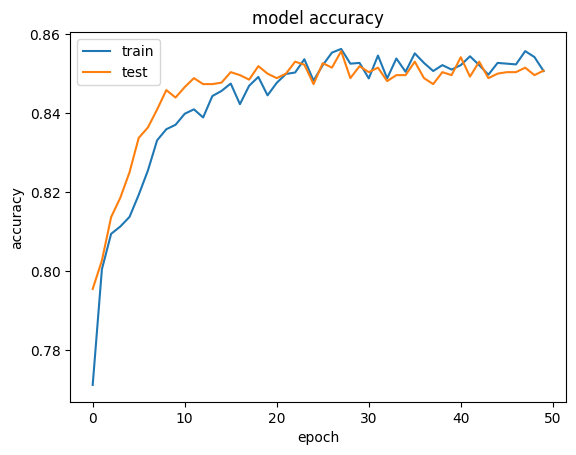

In [75]:
# summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train", "test"], loc="upper left")
plt.show()

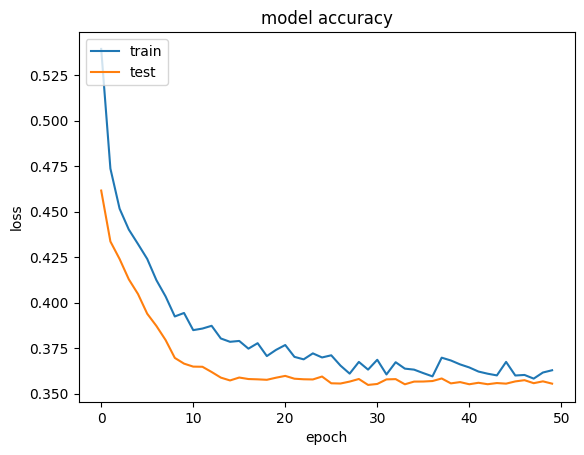

In [76]:
# summarize history for accuracy
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [77]:
# predicting the Test set results
y_pred_results = classifier.predict(X_test)
y_pred = (y_pred_results >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [78]:
 ## make the confusion matrix
 from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(y_test, y_pred)
 cm

array([[1555,   25],
       [ 250,  170]])

In [79]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8625

In [80]:
## Get the weights
classifier.get_weights()

[array([[ 4.8029253e-01,  8.8076048e-02, -1.3712333e-01,  8.7475225e-02,
          3.1977430e-01,  1.0946456e-01,  2.2142785e-02, -1.3311047e-02,
         -8.5700072e-02, -2.2000705e-01,  9.2510860e-03],
        [-5.0383214e-02,  1.6809353e-01,  6.6570985e-01,  4.6287751e-01,
          5.7181334e-01, -8.3278751e-01, -1.9198012e-01, -3.3183166e-01,
         -9.6641761e-01,  2.5090635e-01,  4.9308020e-01],
        [ 2.2442047e-02, -1.6331434e-01, -1.0508311e-01,  2.1595027e-01,
          1.0214197e-01,  3.8888451e-02, -9.7685672e-02, -4.1990507e-01,
         -1.5278278e-01,  2.5227252e-02, -1.2151959e-01],
        [-5.8409940e-02, -5.0441211e-01,  3.1678805e-01,  2.6729563e-01,
         -2.0278944e-01, -8.1634589e-02,  2.3566306e-01, -1.8981203e-01,
          1.2645406e-01, -4.9620500e-01,  2.6806578e-01],
        [ 2.5075261e-02, -1.2424873e+00,  3.9926624e-01, -8.2581300e-01,
         -2.6485389e-02,  8.1797659e-02,  1.1365091e+00,  1.0183646e-01,
         -2.1186060e-01,  4.5101526e-0